# Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib as plt
import seaborn as sns


# Import data

In [4]:
# Import data from URL and add column names
thyroid_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data', header = None)
thyroid_df.columns = ['class', 't3_resin', 'isotopic', 'radioimmuno', 'tsh', 'tsh_diff']

thyroid_df.head()

,class,t3_resin,isotopic,radioimmuno,tsh,tsh_diff
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


# Data transformation to binary classifier

In [5]:
thyroid_df['class'].replace(1, 0, inplace = True)
thyroid_df['class'].replace(3, 0, inplace = True)
thyroid_df['class'].replace(2, 1, inplace = True)

In [6]:
    thyroid_df.head()

,class,t3_resin,isotopic,radioimmuno,tsh,tsh_diff
0,0,107,10.1,2.2,0.9,2.7
1,0,113,9.9,3.1,2.0,5.9
2,0,127,12.9,2.4,1.4,0.6
3,0,109,5.3,1.6,1.4,1.5
4,0,105,7.3,1.5,1.5,-0.1


In [315]:
thyroid_df['class'].value_counts()

0    180
1     35
Name: class, dtype: int64

In [316]:
# Separate labels, so we don't scale the categorical values
thyroid_features = thyroid_df.iloc[:, 1:]
thyroid_labels = thyroid_df.iloc[:,0]

# Fit logistic regression function

In [317]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
lr_simple = logreg.fit(thyroid_features.iloc[:, 4:], thyroid_labels)

In [318]:
# Coefficients of fitted model
lr_simple.coef_

array([[-2.277223]])

In [319]:
# Intercept of fitted model
lr_simple.intercept_

array([0.26312668])

In [320]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
lr = logreg.fit(thyroid_features,thyroid_labels,)

In [321]:
# Coefficients of fitted model
lr.coef_

array([[-0.17823607,  1.24457944,  1.37847279, -0.42133262, -1.25603867]])

In [322]:
# Intercept of fitted model
lr.intercept_

array([0.38183857])

In [323]:
thyroid_df.iloc[146:156, :]

,class,t3_resin,isotopic,radioimmuno,tsh,tsh_diff
146,0,114,7.5,1.1,1.6,4.4
147,0,111,11.9,2.3,0.9,3.8
148,0,104,6.1,1.8,0.5,0.8
149,0,102,6.6,1.2,1.4,1.3
150,1,139,16.4,3.8,1.1,-0.2
151,1,111,16.0,2.1,0.9,-0.1
152,1,113,17.2,1.8,1.0,0.0
153,1,65,25.3,5.8,1.3,0.2
154,1,88,24.1,5.5,0.8,0.1
155,1,65,18.2,10.0,1.3,0.1


In [324]:
ex1 = thyroid_features.iloc[146:156].to_numpy()

In [325]:
ex1.shape

(10, 5)

In [326]:
lr.coef_.T.shape

(5, 1)

In [327]:
np.matmul(ex1, lr.coef_.T) + lr.intercept_

array([[-15.28710996],
       [ -6.57352882],
       [ -9.29702442],
       [-10.15256492],
       [  1.04406604],
       [  3.15210317],
       [  3.70784739],
       [ 27.48055591],
       [ 21.81035929],
       [ 24.55923144]])

In [328]:
logit_v(sigmoid_v(np.matmul(ex1, lr.coef_.T)+ lr.intercept_))

array([[-15.28710996],
       [ -6.57352882],
       [ -9.29702442],
       [-10.15256492],
       [  1.04406604],
       [  3.15210317],
       [  3.70784739],
       [ 27.48053127],
       [ 21.81035924],
       [ 24.55923028]])

In [343]:
import math
def logit(x):
    return np.log(x/(1.0-x))
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
sigmoid_v = np.vectorize(sigmoid)
logit_v = np.vectorize(logit)
sigmoid_v(np.matmul(ex1, lr.coef_.T)+ lr.intercept_)

array([[2.29557983e-07],
       [1.39491095e-03],
       [9.16882691e-05],
       [3.89744639e-05],
       [7.39633790e-01],
       [9.58991513e-01],
       [9.76057056e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00]])

In [330]:
np.log(sigmoid_v(np.matmul(ex1, lr.coef_.T)+ lr.intercept_))

array([[-1.52871102e+01],
       [-6.57492470e+00],
       [-9.29711611e+00],
       [-1.01526039e+01],
       [-3.01600094e-01],
       [-4.18730544e-02],
       [-2.42342349e-02],
       [-1.16240351e-12],
       [-3.37195161e-10],
       [-2.15805152e-11]])

In [344]:
logit_v(sigmoid_v(np.matmul(ex1, lr.coef_.T)+ lr.intercept_))

array([[-15.28710996],
       [ -6.57352882],
       [ -9.29702442],
       [-10.15256492],
       [  1.04406604],
       [  3.15210317],
       [  3.70784739],
       [ 27.48053127],
       [ 21.81035924],
       [ 24.55923028]])

In [331]:
lr.predict(thyroid_features.iloc[146:156])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [332]:
lr.predict_log_proba(thyroid_features.iloc[146:156])

array([[-2.29558009e-07, -1.52871102e+01],
       [-1.39588474e-03, -6.57492470e+00],
       [-9.16924727e-05, -9.29711611e+00],
       [-3.89752234e-05, -1.01526039e+01],
       [-1.34566614e+00, -3.01600094e-01],
       [-3.19397622e+00, -4.18730544e-02],
       [-3.73208163e+00, -2.42342349e-02],
       [-2.74805313e+01, -1.16240351e-12],
       [-2.18103592e+01, -3.37195161e-10],
       [-2.45592303e+01, -2.15805152e-11]])

In [333]:
lr.predict_proba(thyroid_features.iloc[146:156])

array([[9.99999770e-01, 2.29557983e-07],
       [9.98605089e-01, 1.39491095e-03],
       [9.99908312e-01, 9.16882691e-05],
       [9.99961026e-01, 3.89744639e-05],
       [2.60366210e-01, 7.39633790e-01],
       [4.10084874e-02, 9.58991513e-01],
       [2.39429436e-02, 9.76057056e-01],
       [1.16240351e-12, 1.00000000e+00],
       [3.37195161e-10, 1.00000000e+00],
       [2.15805152e-11, 1.00000000e+00]])

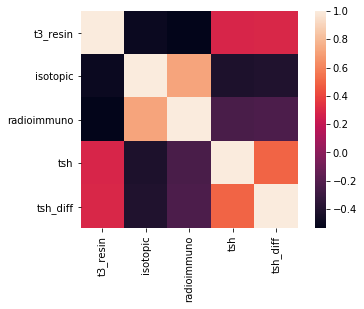

In [339]:
# Calculate correlations between the variables.
corr = thyroid_features.corr()

# plt.figure(figsize=(10, 10))
sns.heatmap(corr,square=True)
# plt.show()

# Plot sigmoid function

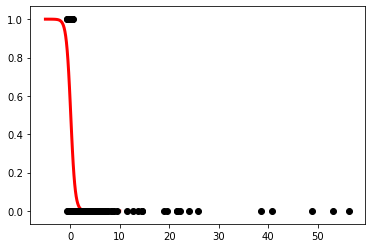

In [340]:
import matplotlib.pyplot as plt
x_simple = thyroid_features.iloc[:, 4:]
x_space = np.linspace(-5, 10, 100)
def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(x_space * lr_simple.coef_ + lr_simple.intercept_).ravel()
plt.plot(x_space, loss, color='red', linewidth=3)
plt.scatter(thyroid_features['tsh_diff'].ravel(), thyroid_labels, color='black', zorder=20)
plt.show()

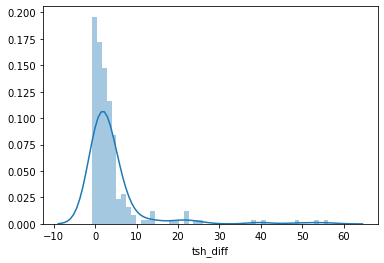

In [341]:
sns.distplot(thyroid_df['tsh_diff'])
plt.show()